In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## **NYC TLC Record** ##
**NYC TLC** merupakan komisi taksi dan limusin kota NewYork. TLC juga mengatur dan memberi lisensi taksi medali dan industri kendaraan sewaan , termasuk perusahaan berbasis aplikasi seperti Uber dan Lyft. Lembaga ini telah merekam data taxi selama 30 hari yang kemudian dapat kita analisis data ini untuk bisa menarik informasi darinya.

In [108]:
NewYork = pd.read_csv('NYC TLC Trip Record.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\1481623928.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  NewYork = pd.read_csv('NYC TLC Trip Record.csv')


In [109]:
NewYork.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [110]:
NewYork.tail(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [127]:
NewYork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  int32         
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  int32         
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [112]:
NewYork.shape

(68211, 20)

## **Handle NaN** ##
**Kebanyakan** dari data kosong yang ada *diisi dengan* nilai **mediannya**, tidak menggunakan mean **karena** data yang ada **belum tentu terdistribusi normal.**
**Juga** karena **proporsi** dari *nilai kosong* tersebut tergolong kecil yakni **dibawah 30%** dari total keseluruhan data.
Kalaupun terdapat data yang bernilai kosong dan proporsinya di atas 30% maka akan saya bagi menjadi beberapa bagian, salah satunya untuk dianalisis (maka NaN nya akan dihapus), sementara yang lainnya dibiarkan memiliki nilai kosong (selagi nilai kosong itu tidak memengaruhi nilai data yang akan dianalisis).
Namun untungnya pada data kali ini tak ada kasus seperti yang dijelaskan diatas, Jikalaupun ada nilai NaN yang lebih besar dari 30% maka nilai NaN-nya itu memiliki proporsi 100% alias seluruh kolomnya bernilai kosong (yang memungkinkan saya untuk langsung menghapus kolomnya sekaligus)

In [113]:
#Periksa nilai kosong yang masih ada
NewYork.isnull().sum()*100/len(NewYork)

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

In [114]:
NewYork.drop('ehail_fee', axis = 1, inplace = True)

In [115]:
#mengisi nilai kosong pada store and fwd flag dengan modus karena store and fwd merupakan kategori
modus = NewYork['store_and_fwd_flag'].mode()[0]
NewYork['store_and_fwd_flag'].fillna(modus, inplace = True)

In [116]:
# terdapat nilai yang salah yakni 99 sementara pada keterangannya RatecodeID ini merupakan 
# kategori dengan rentang nilai nomor dari 1 sampai 6
NewYork['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., 99., nan])

In [117]:
# membuat fungsi untuk mengubah nilai yang salah
def ubah_nilai_yang_salah(data):
    if data>5 :
        return 6
    else:
        return data

In [118]:
NewYork['RatecodeID'] = NewYork['RatecodeID'].apply(ubah_nilai_yang_salah)
NewYork['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2.,  6., nan])

In [119]:
modus = NewYork['RatecodeID'].mode()[0]
NewYork['RatecodeID'].fillna(modus, inplace=True)

In [120]:
# mengisi nilai kosong dengan menggunakan median dan bukan mean karena tidak mungkin nilai jumlah manusia merupakan bil.real
median = NewYork['passenger_count'].median()
NewYork['passenger_count'].fillna(median, inplace=True)

In [121]:
# nilai NaN diisi dengan nilai lima karena berdasarkan keterangannya 5 untuk keterangan unknown
NewYork['payment_type'].fillna(5, inplace=True)

In [122]:
# mengisi nilai kosong dari kolom tipe trip dengan modus
modus = NewYork['trip_type'].mode()[0]
NewYork['trip_type'].fillna(modus, inplace=True)

In [123]:
# membuat fungsi yang menghilangkan negatif untuk data pada kolom congestion_surcharge, karena tidak mungkin biaya tambahan
# yang dibayarkan penumpang seperti congestion_surchange bernilai negatif
def ganti_nilai_negatif(data):
    if data < 0:
        return data * -1
    else:
        return data

In [124]:
NewYork['congestion_surcharge'] = NewYork['congestion_surcharge'].apply(ganti_nilai_negatif)

In [125]:
# mengisi nilainya dengan median karena datanya belum tentu terdistribusi normal, kalaupun terdistribusi normal pasti
#nilai median == mean
median = NewYork['congestion_surcharge'].median()
NewYork['congestion_surcharge'].fillna(median, inplace = True)

In [126]:
# mengganti seluruh tipe data dengan tipe data yang sesuai
NewYork['store_and_fwd_flag'] = NewYork['store_and_fwd_flag'].astype(str)
NewYork['lpep_pickup_datetime'] = pd.to_datetime(NewYork['lpep_pickup_datetime'])
NewYork['lpep_dropoff_datetime'] = pd.to_datetime(NewYork['lpep_dropoff_datetime'])
NewYork['payment_type'] = NewYork['payment_type'].astype('category')
NewYork['trip_type'] = NewYork['trip_type'].astype('category')
NewYork['passenger_count'] = NewYork['passenger_count'].astype(int)
NewYork['RatecodeID'] = NewYork['RatecodeID'].astype(int)

## **Handle Outlier, Duplikat dan Salah Ketik**
Untuk mengidentifikasi adanya salah ketik maka akan digunakannya fungsi { .unique() } namun kebanyakan dari hal tersebut sudah dilakukan pada bagian Handle NaN. Sementara itu, untuk nilai duplikat sendiri tidak ditemukan kesalahan pada data ini (atau mungkin saya yang terkecoh). Pada data ini terdapat nilai outlier yang signifikan terutama pada kolom trip_distance dan kolom duration yang saya buat berdasarkan hasil pengurangan datetime_dropoff dan datetime_pickup, duration sendiri memuat nilai lama waktu perjalanan yang dihabiskan supir untuk mengantar penumpang. 
Pada Outlier kali ini saya menggunakan metode batas interquartile, yaitu dengan menghapus nilai outlier yang berada di atas nilai q3 + iqr * 1,5 dan di bawah q1 - iqr * 1,5

In [22]:
# membuat kolom duration
NewYork['duration'] = NewYork['lpep_dropoff_datetime'] - NewYork['lpep_pickup_datetime']

In [23]:
# memeriksa salah ketik pada kolom VendorID
NewYork['VendorID'].unique()

array([2, 1], dtype=int64)

In [24]:
# terdapat niai duplikat pada datetime_pickup namun sayangnya itu merupakan datetime yang bisa jadi kebetulan
NewYork['lpep_pickup_datetime'].duplicated().sum()

1636

In [25]:
# begitu juga dengan datetime_dropoff
NewYork['lpep_dropoff_datetime'].duplicated().sum()

1692

In [26]:
# memeriksa salah ketik pada kolom store_and_fwd_flag
NewYork['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [27]:
#Menghitung banyak dari tiap value yang berbeda pada RatecodeID
NewYork['RatecodeID'].value_counts()

RatecodeID
1    66427
5     1529
2      158
4       57
3       30
6       10
Name: count, dtype: int64

In [28]:
#Menghitung jumlah nilai yang berbeda 
NewYork['DOLocationID'].nunique()

249

In [29]:
#Menghitung jumlah nilai yang berbeda 
NewYork['PULocationID'].nunique()

226

In [30]:
# ID drop out tidak mungkin sama dengan ID pick up
NewYork = NewYork[NewYork['DOLocationID'] != NewYork['PULocationID']]

In [31]:
# terdapat nilai max yang tidak biasa
NewYork['passenger_count'].describe()

count    59583.000000
mean         1.297602
std          0.955164
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: passenger_count, dtype: float64

In [32]:
#Namun rupanya hasil dari keduanya adalah 1 yang mengakibatkan iqr = 0, karena iqr = 0 
#maka nilai selain 1 bukanlah outlier melainkan nilai yang rentangnya jauh dari rata-rata
q1 = NewYork['passenger_count'].describe()['25%']
q3 = NewYork['passenger_count'].describe()['75%']
iqr = q3 - q1
mencari_outlier1 = q1 - iqr*1.5
mencari_outlier2 = q3 + iqr*1.5

## **Handle Outlier** ##
Menghandle oulier dari trip_distance dan duration

In [33]:
# terdapat nilai min yang tidak biasa tidak mungkin jarak yang ditempuh bernilai 0
NewYork['trip_distance'].min()

0.0

In [34]:
# Maka dibuatlah dataframe baru tanpa nilai 0 pada trip_distance-nya untuk kemudian
# dibandingkan grafik distribusinya dengan dataframe sebelumnya
hapus_zero_distance = NewYork[NewYork['trip_distance']==0].index
NewYork2 = NewYork.drop(hapus_zero_distance)

In [35]:
NewYork2.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,0 days 00:17:33


In [36]:
# konversi timedelta pada kolom duration ke total second dan ubah ke menit dengan membaginya dengan 60
NewYork2['duration'] = NewYork2['duration'].dt.total_seconds()
NewYork2['duration'] = NewYork2['duration']/60
NewYork2['duration'] = round(NewYork2['duration'],2)

In [37]:
# menghapus nilai outlier
q1 = NewYork2['duration'].describe()['25%']
q3 = NewYork2['duration'].describe()['75%']
iqr = q3 - q1
batas_bawah = q1 - iqr*1.5
batas_atas = q3 + iqr*1.5

In [38]:
# Membuat dataframe lain berisi durasi tanpa outlier
NewYork3 = NewYork2[(NewYork2['duration'] <= batas_atas) & (NewYork2['duration'] >= batas_bawah)]

In [39]:
# Lalu ukurannya dibandingkan
NewYork2.shape

(57517, 20)

In [40]:
NewYork3.shape

(54633, 20)

In [41]:
NewYork2['duration'].describe()

count    57517.000000
mean        18.672635
std         73.661360
min          0.000000
25%          8.250000
50%         12.220000
75%         18.000000
max       1438.930000
Name: duration, dtype: float64

In [42]:
NewYork3['duration'].describe()

count    54633.000000
mean        13.047216
std          6.589992
min          0.000000
25%          8.050000
50%         11.820000
75%         16.920000
max         32.620000
Name: duration, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\1265147429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork2['duration'], color = 'tomato')


<Axes: xlabel='duration', ylabel='Density'>

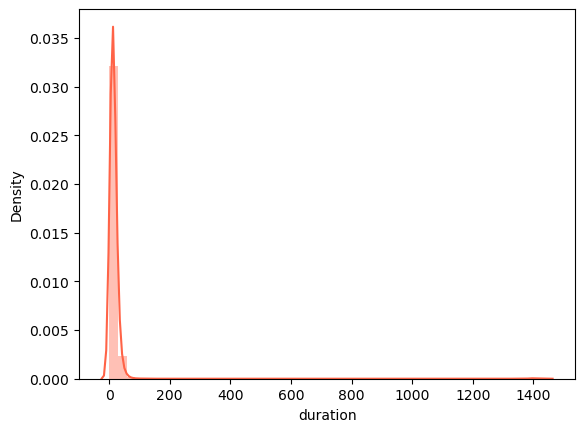

In [43]:
sns.distplot(NewYork2['duration'], color = 'tomato')

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\2326191247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork3['duration'])


<Axes: xlabel='duration', ylabel='Density'>

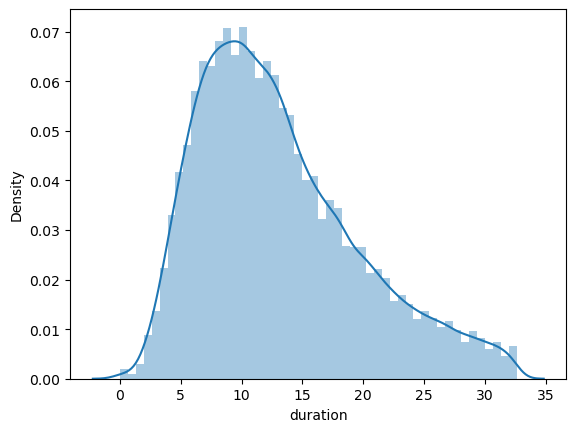

In [44]:
sns.distplot(NewYork3['duration'])

In [45]:
# Dilanjut dengan menghapus nilaii outlier pada trip distance
q1 = NewYork2['trip_distance'].describe()['25%']
q3 = NewYork2['trip_distance'].describe()['75%']
iqr = q3 - q1
batas_bawah2 = q1 - iqr*1.5
batas_atas2 = q3 + iqr*1.5

In [46]:
NewYork3 = NewYork3[(NewYork3['trip_distance'] >= batas_bawah2) & (NewYork3['trip_distance'] <= batas_atas2)]

In [47]:
NewYork2['trip_distance'].describe()

count     57517.000000
mean          9.240659
std         636.641149
min           0.010000
25%           1.390000
50%           2.120000
75%           3.590000
max      120098.840000
Name: trip_distance, dtype: float64

In [48]:
NewYork3['trip_distance'].describe()

count    51802.000000
mean         2.340450
std          1.393554
min          0.010000
25%          1.330000
50%          1.950000
75%          3.000000
max          6.890000
Name: trip_distance, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\655803729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork2['trip_distance'], color = 'tomato')


<Axes: xlabel='trip_distance', ylabel='Density'>

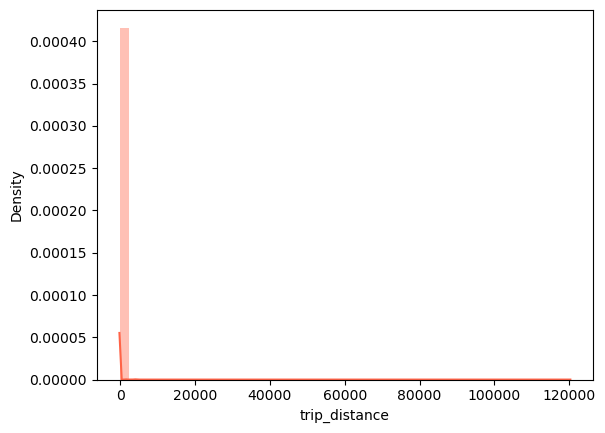

In [49]:
sns.distplot(NewYork2['trip_distance'], color = 'tomato')

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\4221555931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork3['trip_distance'])


<Axes: xlabel='trip_distance', ylabel='Density'>

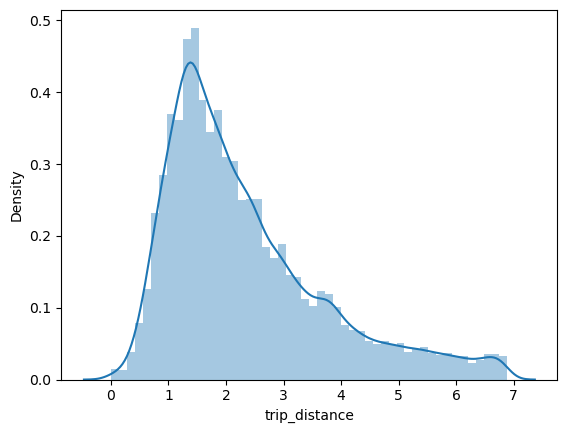

In [50]:
sns.distplot(NewYork3['trip_distance'])

<Axes: xlabel='trip_distance', ylabel='duration'>

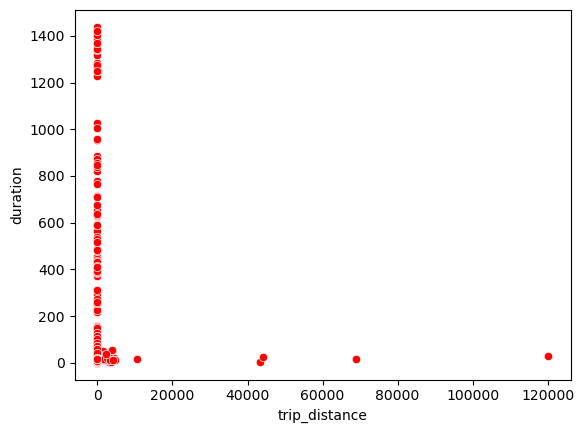

In [51]:
sns.scatterplot(data=NewYork2, x='trip_distance', y = 'duration', color = 'red')

<Axes: xlabel='trip_distance', ylabel='duration'>

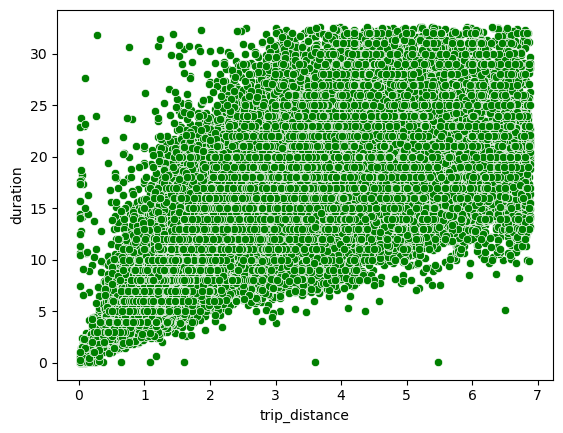

In [52]:
sns.scatterplot(data=NewYork3, x='trip_distance', y = 'duration', color = 'green')

In [106]:
NewYork3['total_amount'].describe()

count    47351.000000
mean        20.219047
std          7.528788
min          1.010000
25%         14.450000
50%         18.690000
75%         24.750000
max         46.950000
Name: total_amount, dtype: float64

In [54]:
NewYork3['RatecodeID'].unique()

array([1, 5, 6, 2, 4, 3])

In [55]:
q1 = NewYork2['total_amount'].describe()['25%']
q3 = NewYork2['total_amount'].describe()['75%']
iqr = q3 - q1
batas_bawah3 = q1 - iqr*1.5
batas_atas3 = q3 + iqr*1.5

In [56]:
NewYork3 = NewYork3[(NewYork3['total_amount'] >= batas_bawah3) & (NewYork3['total_amount'] <= batas_atas3)]

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\879851452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork2['total_amount'], color = 'tomato')


<Axes: xlabel='total_amount', ylabel='Density'>

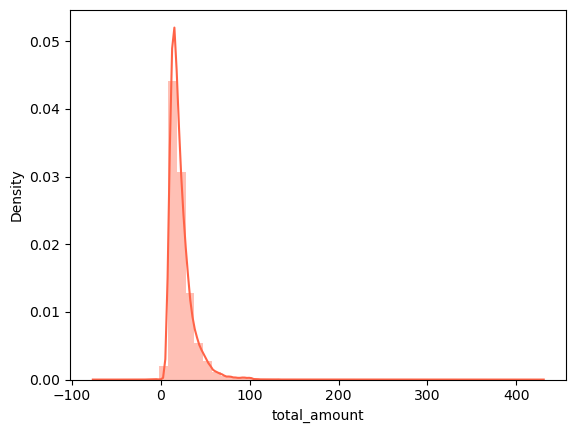

In [57]:
sns.distplot(NewYork2['total_amount'], color = 'tomato')

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\3717943139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork3['total_amount'])


<Axes: xlabel='total_amount', ylabel='Density'>

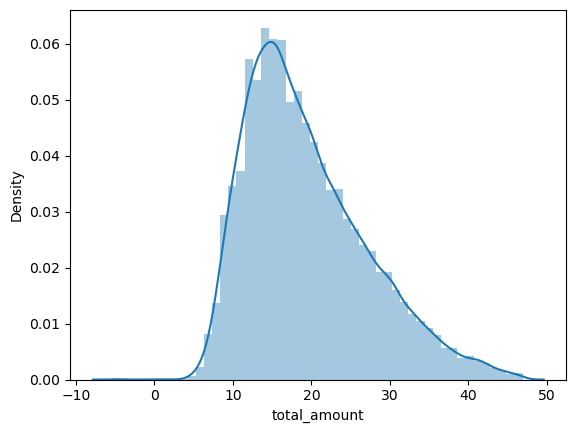

In [58]:
sns.distplot(NewYork3['total_amount'])

<Axes: xlabel='trip_distance', ylabel='total_amount'>

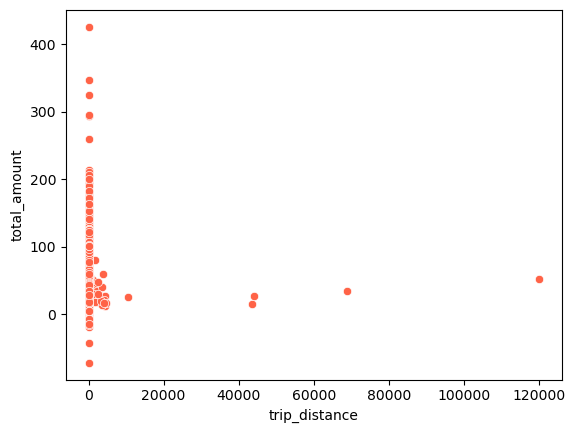

In [59]:
sns.scatterplot(data=NewYork2, x='trip_distance', y = 'total_amount', color = 'tomato')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

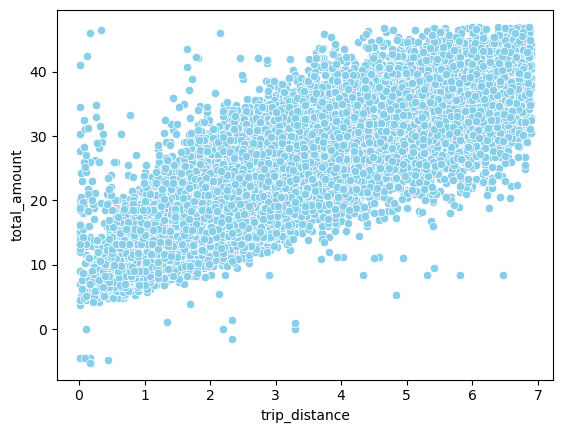

In [60]:
sns.scatterplot(data=NewYork3, x='trip_distance', y = 'total_amount', color = 'skyblue')

## **Typical Taxi Distances**
**Short Rides**: Di daerah perkotaan, perjalanan singkat dengan taksi biasanya dapat menempuh jarak sekitar **1 hingga 5 kilometer** (1.000 hingga 5.000 meter), yang dapat memakan waktu sekitar *5 hingga 15 menit.*
        **Medium Rides**: Untuk perjalanan di dalam kota, orang mungkin menggunakan taksi untuk jarak **5 hingga 15 kilometer** (5.000 hingga 15.000 meter).
        **Long Rides**: Perjalanan taksi yang lebih jauh, seperti dari satu bagian kota ke bagian kota lain atau ke bandara, dapat berkisar antara **15 hingga 30 kilometer** (15.000 hingga 30.000 meter) *atau lebih*, tergantung pada tata letak kota.

**1 km = 0.621371 miles.**
yang artinya
**5 km = 3.106855 miles**

In [62]:
# Membuat kolom baru berisi kategori jarak Taxi
NewYork3['typical_taxi_distance'] = np.where(((NewYork3['trip_distance'] >= 0.621371)&(NewYork3['trip_distance'] <= 3.106855)), 'Short Rides', 
                                             np.where(((NewYork3['trip_distance'] > 3.106855)&(NewYork3['trip_distance'] <= 9.320565)), 'Medium Rides', 'Long Rides'))

In [63]:
# karena 1 km sudah termasuk kedalam short rides yang setara dengan 0.65 mil maka dilakukan filterisasi kembali supaya 
# jaraknya != 0 
# karena 1 hinnga 5 km memakan waktu sekitar 5 hingga 15 menit maka durasi harus lebih besar sama dengan 5
NewYork3 = NewYork3[(NewYork3['trip_distance'] >= 0.621371)]
NewYork3 = NewYork3[(NewYork3['duration'] >= 5)]

In [64]:
# terdapat nilai negatif yang tidak biasa bila saja terdapat kolom yang menjelaskan mengapa nilainya menjadi negatif 
# seperti apakah sopir memiliki kredit atau hutang
# maka nilai ini tidak akan dihapus
NewYork3['fare_amount'].describe()

count    47356.000000
mean        15.025392
std          5.873017
min          0.000000
25%         10.700000
50%         13.500000
75%         18.400000
max         41.200000
Name: fare_amount, dtype: float64

In [65]:
# maka hapus fare_amount yang bernilai negatif 
NewYork3 = NewYork3[NewYork3['fare_amount']>0]

In [66]:
NewYork3['fare_amount'].describe()

count    47351.000000
mean        15.026979
std          5.871297
min          0.010000
25%         10.700000
50%         13.500000
75%         18.400000
max         41.200000
Name: fare_amount, dtype: float64

In [67]:
NewYork3.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,typical_taxi_distance
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.02,Short Rides
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.77,Short Rides
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.82,Short Rides
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.97,Short Rides
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.55,Short Rides


## **Membuat Kolom Tambahan** ##
Dari keterangan yang ada kolom RatecodeID merupakan sebuah kolom kategori berisikan standar kode tarif mulai dari tarif standar dan sebagainya. Maka saya akan membuat kolom baru berisi keterangan tersebut. Begitu juga dengan kolom-kolom lain yangsetpie dengan RatecodeID akan saya buatkan kolom keterangannya

In [68]:
def ubah_nilai(data):
    if data == 1:
        return 'Standard Rate'
    elif data == 2:
        return 'JFK'
    elif data == 3:
        return 'Newark'
    elif data == 4:
        return 'Nassau or Westchester'
    elif data == 5:
        return 'Negotiated fare'
    elif data == 6:
        return 'Group ride'

In [69]:
NewYork3['type_of_fare'] = NewYork3['RatecodeID'].apply(ubah_nilai)

In [70]:
def ubah_payment(data):
    if data == 1:
        return 'Credit card'
    elif data == 2:
        return 'Cash'
    elif data == 3:
        return 'No charge'
    elif data == 4:
        return 'Dispute'
    elif data == 5:
        return 'Unknown'
    elif data == 6:
        return 'Voided trip'

In [71]:
NewYork3['payment_type'] = NewYork3['payment_type'].apply(ubah_payment)

In [72]:
def ubah_tipe_trip(data):
    if data == 1:
        return 'Street-hail'
    elif data == 2:
        return 'Dispatch'

In [73]:
NewYork3['trip_type'] = NewYork3['trip_type'].astype(int)
NewYork3['trip_type'] = NewYork3['trip_type'].apply(ubah_tipe_trip)

In [74]:
# membuat kolom baru hanya berisi tanggal, bulan dan tahun untuk memudahkan analisis
NewYork3['lpep_date_only'] = NewYork3['lpep_pickup_datetime'].dt.date

In [75]:
NewYork3.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,typical_taxi_distance,type_of_fare,lpep_date_only
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,11.02,Short Rides,Standard Rate,2023-01-01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,6.77,Short Rides,Standard Rate,2023-01-01
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00,5.82,Short Rides,Standard Rate,2023-01-01
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00,5.97,Short Rides,Standard Rate,2023-01-01
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,17.55,Short Rides,Standard Rate,2023-01-01


## **Membuat Grafik** ##
Karena data yang dibutuhkan **dirasa** sudah bersih saya akan melanjutkan nya dengan membuat grafik-grafik sederhana yang diharapkan bisa menjadi insight bagi stakeholder. Semoga analisis yang dilakukan tidak salah...

## **Mencari Pola Customer** ##

In [76]:
# Mencari tahu tanggal berapa saja customer banyak menggunakan layanan TAXI
LinePlot = NewYork3.groupby(['lpep_date_only'])['passenger_count'].sum()
LinePlot = pd.DataFrame(LinePlot)
LinePlot.reset_index(inplace = True)

In [77]:
LinePlot.drop(index=0, inplace=True)
LinePlot.drop(index=32, inplace=True)

In [78]:
LinePlot.sort_values('passenger_count', ascending = False)

,lpep_date_only,passenger_count
26,2023-01-26,2387
6,2023-01-06,2385
13,2023-01-13,2348
19,2023-01-19,2348
25,2023-01-25,2335
27,2023-01-27,2257
11,2023-01-11,2241
5,2023-01-05,2237
23,2023-01-23,2224
20,2023-01-20,2209


C:\Users\hp\AppData\Local\Temp\ipykernel_13820\541961127.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


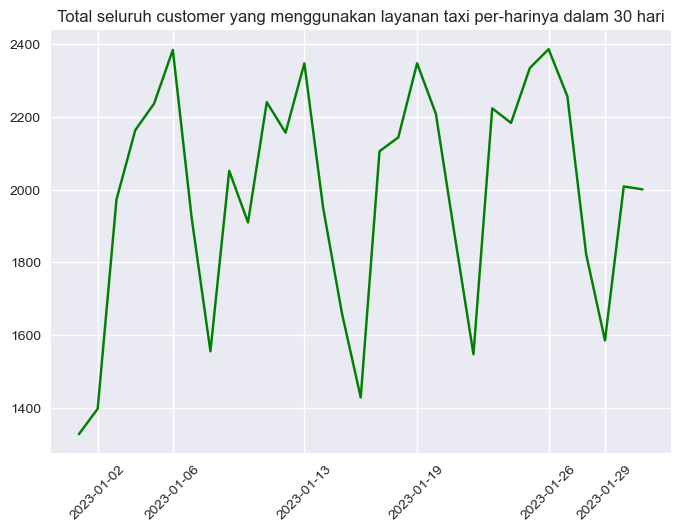

In [128]:
y1 = LinePlot['passenger_count']
x = LinePlot['lpep_date_only']

desired_dates = ['2023-01-02','2023-01-06', '2023-01-13', '2023-01-19' ,'2023-01-26', '2023-01-29']
desired_dates = pd.to_datetime(desired_dates)

plt.style.use('seaborn')
plt.plot(x, y1, 'green')
plt.xticks(ticks=desired_dates, labels=[date.strftime('%Y-%m-%d') for date in desired_dates], rotation = 45)
plt.title('Total seluruh customer yang menggunakan layanan taxi per-harinya dalam 30 hari')
plt.show()

In [80]:
# Membuat dataframe baru berisi kategori jarak Taxi khusus untuk data visualisasi perbandingan tip
# nilai outlier atasnya dipertahankan karena jarak yang bisa dilalui taksi bisa >= 30 km
NewYork4 = NewYork[(NewYork['trip_distance'] >= batas_bawah2)]
NewYork4 = NewYork[(NewYork['trip_distance'] >= 0.621371)]
NewYork4['Typical_TAXI_distance'] = np.where(((NewYork4['trip_distance'] >= 0.621371)&(NewYork4['trip_distance'] <= 3.106855)), 'Short Rides', 
                                             np.where(((NewYork4['trip_distance'] > 3.106855)&(NewYork4['trip_distance'] <= 9.320565)), 'Medium Rides', 'Long Rides'))

C:\Users\hp\AppData\Local\Temp\ipykernel_13820\3128924167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewYork4['Typical_TAXI_distance'] = np.where(((NewYork4['trip_distance'] >= 0.621371)&(NewYork4['trip_distance'] <= 3.106855)), 'Short Rides',


In [81]:
# Mencari tahu rata-rata pemberian tips oleh penumpang terhadap jauh atau dekatnya jarak TAXI yang dilalui 
PieChart = NewYork4.groupby(['Typical_TAXI_distance'])['tip_amount'].median()
PieChart = pd.DataFrame(PieChart)
PieChart.reset_index(inplace=True)

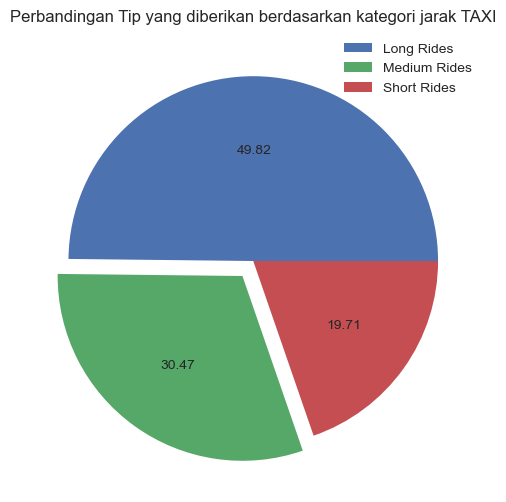

In [82]:
plt.figure(figsize=(8,6))
plt.pie(PieChart['tip_amount'], autopct='%.2f', explode = (0, 0.1, 0))
plt.title('Perbandingan Tip yang diberikan berdasarkan kategori jarak TAXI')
plt.legend(labels = PieChart['Typical_TAXI_distance'])
plt.show()

In [99]:
# Mencari tahu lokasi penjemputan paling banyak
Lokasi_PU_Terbanyak = NewYork3.groupby(['PULocationID'])['passenger_count'].count()
Lokasi_PU_Terbanyak = pd.DataFrame(Lokasi_PU_Terbanyak)
Lokasi_PU_Terbanyak.sort_values('passenger_count', ascending = False, inplace = True)
Lokasi_PU_Terbanyak = Lokasi_PU_Terbanyak[Lokasi_PU_Terbanyak['passenger_count'] > 2230]
Lokasi_PU_Terbanyak.reset_index(inplace = True)

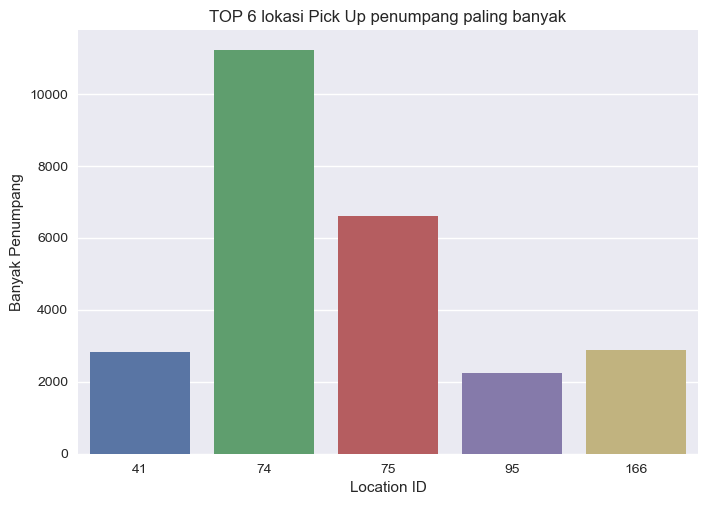

In [100]:
sns.barplot(data = Lokasi_PU_Terbanyak, x = 'PULocationID', y = 'passenger_count')
plt.xlabel('Location ID')
plt.ylabel('Banyak Penumpang')
plt.title('TOP 6 lokasi Pick Up penumpang paling banyak')
plt.show()

In [85]:
#Mencari tahu lokasi pengantaran paling banyak
Lokasi_DO_Terbanyak = NewYork3.groupby(['DOLocationID'])['passenger_count'].count()
Lokasi_DO_Terbanyak = pd.DataFrame(Lokasi_DO_Terbanyak)
Lokasi_DO_Terbanyak.sort_values('passenger_count', ascending = False, inplace = True)
Lokasi_DO_Terbanyak = Lokasi_DO_Terbanyak[Lokasi_DO_Terbanyak['passenger_count']>1700]
Lokasi_DO_Terbanyak.reset_index(inplace = True)

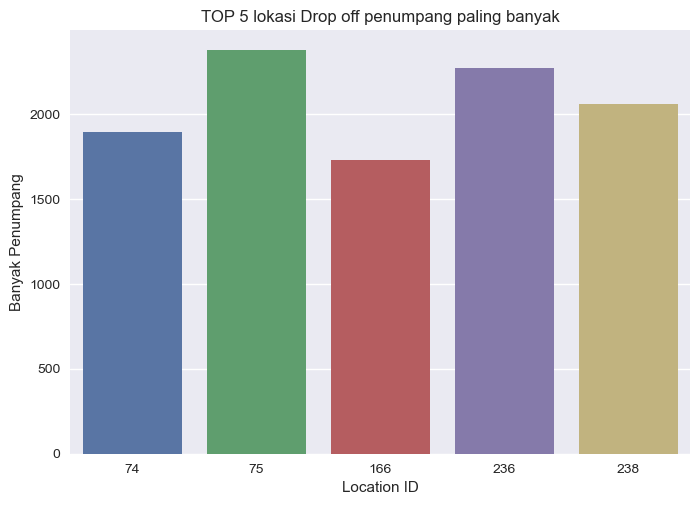

In [86]:
sns.barplot(data = Lokasi_DO_Terbanyak, x = 'Location ID', y = 'passenger_count')
plt.xlabel('Location ID')
plt.ylabel('Banyak Penumpang')
plt.title('TOP 5 lokasi Drop off penumpang paling banyak')
plt.show()

In [134]:
#Mencari tahu Tipe tarif yang dipilih customer dan rata-rata total tarif yang dibayarkan
A = NewYork3.groupby(['type_of_fare'])[['total_amount']].mean()
A.reset_index(inplace = True)
A.sort_values('total_amount', ascending = False, inplace = True)
A

,type_of_fare,total_amount
1,Nassau or Westchester,36.000000
3,Newark,31.800000
2,Negotiated fare,21.947529
4,Standard Rate,20.205826
0,Group ride,19.700000


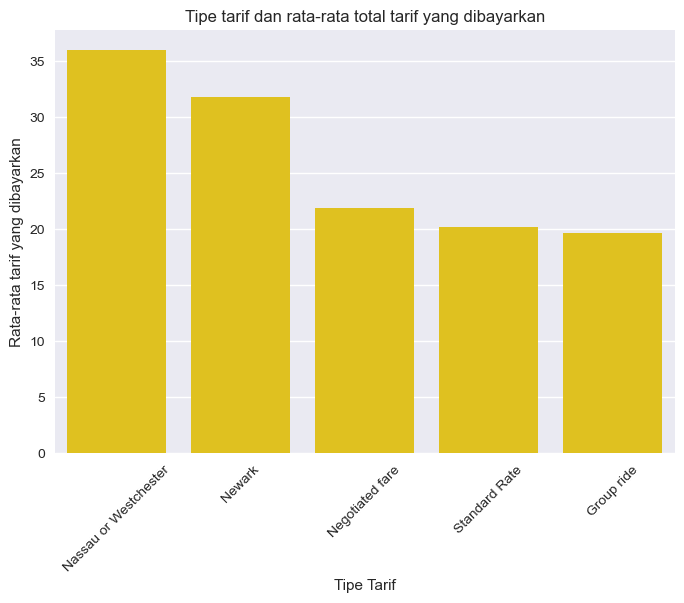

In [89]:
sns.barplot(data = A, x = 'type_of_fare', y = 'total_amount', color = 'gold')
plt.xlabel('Tipe Tarif')
plt.ylabel('Rata-rata tarif yang dibayarkan')
plt.title('Tipe tarif dan rata-rata total tarif yang dibayarkan')
plt.xticks(rotation=45)
plt.show()

<Axes: >

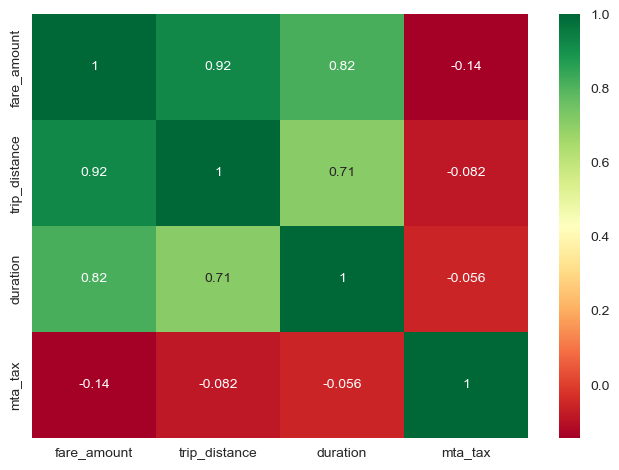

In [260]:
korelasi = NewYork3[['fare_amount','trip_distance','duration','mta_tax']].corr()
sns.heatmap(korelasi, annot=True, cmap='RdYlGn')

In [85]:
B = NewYork3['payment_type'].value_counts()
B = pd.DataFrame(B)
B['count'] = B['count'].apply(lambda x : x*100/B['count'].sum())

In [86]:
A = NewYork3.groupby(['payment_type'])[['total_amount']].median()

In [87]:
Gabungan = pd.merge(B, A, on = 'payment_type')
Gabungan.reset_index(inplace=True)
Gabungan

,payment_type,count,total_amount
0,Credit card,62.364047,19.855
1,Cash,31.479800,15.700
2,Unknown,5.989314,22.230
3,No charge,0.135161,14.300
4,Dispute,0.031678,17.800


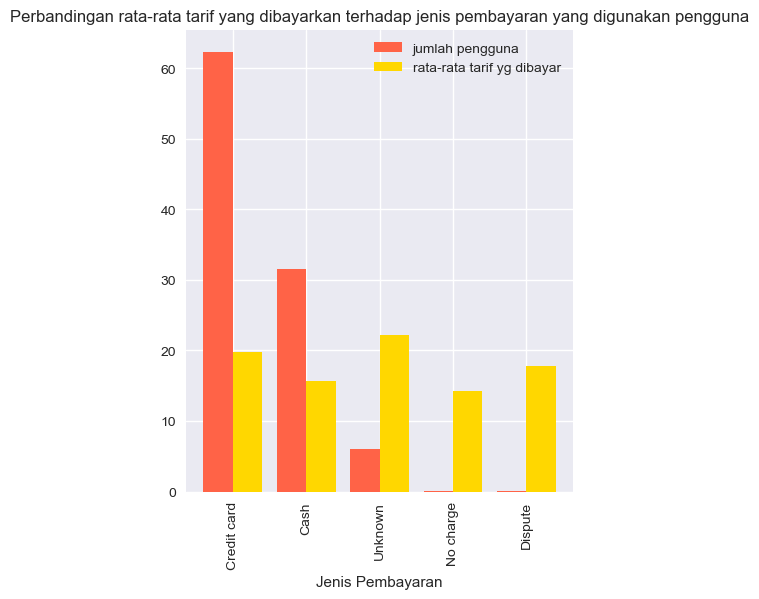

In [88]:
x = Gabungan['payment_type']
y = Gabungan['total_amount']
y1 = Gabungan['count']

x_axis = np.arange(len(Gabungan['payment_type']))

plt.figure(figsize=(5,6))

plt.bar(x_axis - 0.2, y1, 0.4, color = 'tomato')
plt.bar(x_axis + 0.2, y , 0.4, color = 'gold')

plt.xticks(x_axis, x) 
plt.xlabel('Jenis Pembayaran')
plt.ylabel('')
plt.title('Perbandingan rata-rata tarif yang dibayarkan terhadap jenis pembayaran yang digunakan pengguna')
plt.legend(['jumlah pengguna','rata-rata tarif yg dibayar'])

plt.xticks(rotation=90)
plt.show()

## **Kemacetan** ##
Dilakukan analisis deskriptif untuk menemukan lokasi mana saja yang sering terjadi kemacetan. Dengan mengelompokan Lokasi drop off id dengan durasi paling lama

In [156]:
#Mencari lokasi dropoff customer yang rata-rata durasi perjalanannya paling lama
Macet = NewYork3.groupby(['DOLocationID'])[['duration','trip_distance']].median()

In [157]:
Macet['durasi/mil'] = Macet['duration']/Macet['trip_distance']

In [160]:
Macet = Macet.sort_values('durasi/mil', ascending = False)
Macet.head(5)

,duration,trip_distance,durasi/mil
DOLocationID,,,
115,17.930,1.85,9.691892
65,10.075,1.14,8.837719
33,10.170,1.18,8.618644
189,12.980,1.60,8.112500
97,10.580,1.31,8.076336


In [161]:
#Dicari Pick Up lokasi dari ID lokasi 115
NewYork3[NewYork3['DOLocationID']==115][['DOLocationID','PULocationID','trip_distance','duration','lpep_pickup_datetime']]

,DOLocationID,PULocationID,trip_distance,duration,lpep_pickup_datetime
17662,115,221,1.85,17.93,2023-01-10 08:31:42


In [164]:
#Dicari Pick Up lokasi dari ID Drop Off lokasi 65
ID65 = NewYork3[NewYork3['DOLocationID']==65][['DOLocationID','PULocationID','trip_distance','duration','lpep_pickup_datetime']]

In [165]:
ID65['durasi/mil'] = ID65['duration'] / ID65['trip_distance']

In [176]:
#Dicari lokasi Pick Up terbanyak menuju Lokasi ID 65, kenapa yang terbanyak? untuk mencari tahu seberapa sering 
#tempat tersebut terjadi kemacetan
Tabel = ID65['PULocationID'].value_counts()
pd.DataFrame(Tabel)

,count
PULocationID,
97,39
66,21
33,12
25,7
181,7
36,4
112,3
188,3
40,2


In [167]:
Kemacetan2 = ID65.sort_values('durasi/mil',ascending = False)

In [168]:
Kemacetan2.head(10)

,DOLocationID,PULocationID,trip_distance,duration,lpep_pickup_datetime,durasi/mil
928,65,66,0.64,13.17,2023-01-01 17:20:08,20.578125
32803,65,33,1.38,26.62,2023-01-17 15:18:43,19.289855
8600,65,97,0.66,10.38,2023-01-05 17:04:26,15.727273
67988,65,54,0.99,15.00,2023-01-30 09:25:00,15.151515
55220,65,97,0.89,13.25,2023-01-27 16:43:31,14.887640
18568,65,25,0.66,9.68,2023-01-10 16:07:21,14.666667
22365,65,97,1.20,17.25,2023-01-12 10:02:49,14.375000
29641,65,97,0.74,10.08,2023-01-15 17:10:08,13.621622
5374,65,97,0.90,12.23,2023-01-04 11:58:36,13.588889
19766,65,40,1.26,16.57,2023-01-11 09:51:44,13.150794


In [199]:
PULoc2 = Kemacetan2.groupby(['DOLocationID','PULocationID'])[['trip_distance','durasi/mil','PULocationID']].median()
PULoc2 = PULoc2[(PULoc2['PULocationID']==97)|(PULoc2['PULocationID']==66)|(PULoc2['PULocationID']==33)]

In [178]:
ID33 = NewYork3[NewYork3['DOLocationID']==33][['DOLocationID','PULocationID','trip_distance','duration','lpep_pickup_datetime']]

In [179]:
ID33['durasi/mil'] = ID33['duration'] / ID33['trip_distance']

In [185]:
#Dicari lokasi Pick Up terbanyak menuju Lokasi ID 33
Tabel2 = ID33['PULocationID'].value_counts()
pd.DataFrame(Tabel2)

,count
PULocationID,
97,42
65,37
66,26
25,22
52,19
40,7
181,5
17,4
36,2


In [175]:
Kemacetan3 = ID33.sort_values('durasi/mil',ascending = False)
Kemacetan3.head(10)

,DOLocationID,PULocationID,trip_distance,duration,lpep_pickup_datetime,durasi/mil
36619,33,65,0.67,20.30,2023-01-19 11:39:49,30.298507
7675,33,65,0.67,17.57,2023-01-05 11:59:04,26.223881
806,33,66,0.90,16.85,2023-01-01 16:22:27,18.722222
66074,33,25,1.23,22.00,2023-01-17 09:52:00,17.886179
3223,33,65,0.90,15.18,2023-01-03 10:57:12,16.866667
15546,33,97,1.56,24.03,2023-01-09 08:54:44,15.403846
33124,33,52,0.69,10.57,2023-01-17 17:56:14,15.318841
47861,33,65,1.21,17.07,2023-01-24 16:24:49,14.107438
16127,33,97,0.90,12.43,2023-01-09 13:24:44,13.811111
36569,33,40,0.91,12.40,2023-01-19 10:14:52,13.626374


In [200]:
PULoc3 = Kemacetan3.groupby(['DOLocationID','PULocationID'])[['trip_distance','durasi/mil','PULocationID']].median()
PULoc3 = PULoc3[(PULoc3['PULocationID']==97)|(PULoc3['PULocationID']==65)|(PULoc3['PULocationID']==66)]

In [189]:
ID189 = NewYork3[NewYork3['DOLocationID']==189][['DOLocationID','PULocationID','trip_distance','duration','lpep_pickup_datetime']]

In [190]:
ID189['durasi/mil'] = ID189['duration'] / ID189['trip_distance']

In [191]:
Kemacetan4 = ID189.sort_values('durasi/mil',ascending = False)
Kemacetan4.head(10)

,DOLocationID,PULocationID,trip_distance,duration,lpep_pickup_datetime,durasi/mil
37613,189,65,0.87,21.03,2023-01-19 17:08:12,24.172414
39572,189,65,1.00,21.08,2023-01-20 15:48:28,21.080000
35476,189,65,1.00,20.85,2023-01-18 18:35:20,20.850000
33217,189,97,1.69,27.88,2023-01-17 18:29:49,16.497041
37873,189,97,1.08,16.37,2023-01-19 18:47:50,15.157407
32357,189,97,1.07,15.97,2023-01-17 12:25:12,14.925234
57120,189,65,1.53,22.68,2023-01-28 15:56:33,14.823529
10495,189,97,1.19,17.57,2023-01-06 15:54:27,14.764706
45477,189,97,1.15,16.82,2023-01-23 15:55:37,14.626087
32675,189,97,1.65,23.68,2023-01-17 14:28:24,14.351515


In [192]:
#Dicari lokasi Pick Up terbanyak menuju Lokasi ID 189
Tabel3 = ID189['PULocationID'].value_counts()
pd.DataFrame(Tabel3)

,count
PULocationID,
97,110
65,58
33,17
25,12
66,11
181,8
52,5
255,5
49,4


In [201]:
PULoc4 = Kemacetan4.groupby(['DOLocationID','PULocationID'])[['trip_distance','durasi/mil','PULocationID']].median()
PULoc4 = PULoc4[(PULoc4['PULocationID']==97)|(PULoc4['PULocationID']==65)|(PULoc4['PULocationID']==66)]

In [194]:
ID97 = NewYork3[NewYork3['DOLocationID']==97][['DOLocationID','PULocationID','trip_distance','duration','lpep_pickup_datetime']]

In [195]:
ID97['durasi/mil'] = ID97['duration'] / ID97['trip_distance']

In [196]:
Kemacetan5 = ID97.sort_values('durasi/mil',ascending = False)
Kemacetan5.head(10)

,DOLocationID,PULocationID,trip_distance,duration,lpep_pickup_datetime,durasi/mil
36501,97,181,1.53,23.08,2023-01-19 10:16:58,15.084967
47681,97,65,0.79,11.80,2023-01-24 15:40:07,14.936709
7538,97,25,0.70,9.87,2023-01-05 10:32:19,14.100000
53474,97,65,0.65,9.00,2023-01-26 20:09:08,13.846154
53203,97,52,1.40,19.30,2023-01-26 18:06:02,13.785714
45711,97,65,0.69,9.42,2023-01-23 16:50:29,13.652174
37132,97,65,1.08,14.68,2023-01-19 15:43:28,13.592593
52989,97,65,1.00,13.05,2023-01-26 17:09:15,13.050000
60926,97,65,0.97,12.63,2023-01-30 16:21:27,13.020619
22983,97,65,1.20,14.90,2023-01-12 15:57:39,12.416667


In [192]:
#Dicari lokasi Pick Up terbanyak menuju Lokasi ID 97
Tabel4 = ID189['PULocationID'].value_counts()
pd.DataFrame(Tabel3)

,count
PULocationID,
97,110
65,58
33,17
25,12
66,11
181,8
52,5
255,5
49,4


In [202]:
PULoc5 = Kemacetan5.groupby(['DOLocationID','PULocationID'])[['trip_distance','durasi/mil','PULocationID']].median()
PULoc5 = PULoc5[(PULoc5['PULocationID']==65)|(PULoc5['PULocationID']==33)|(PULoc5['PULocationID']==66)]

In [276]:
NewYork3.to_csv('NYC_Trip_Record.csv', index=False)

In [203]:
pd.concat([PULoc2,PULoc3,PULoc4,PULoc5])

trip_distance  durasi/mil  PULocationID
DOLocationID PULocationID                                         
65           33                    0.930    8.890655          33.0
             66                    1.070    8.026316          66.0
             97                    0.970    9.058252          97.0
33           65                    1.180    8.418301          65.0
             66                    1.005    6.852273          66.0
             97                    1.295    9.631858          97.0
189          65                    1.580    8.129846          65.0
             66                    3.050    7.081967          66.0
             97                    1.455    7.965054          97.0
97           33                    1.435    7.941459          33.0
             65                    1.190    7.954198          65.0
             66                    1.790    7.065000          66.0

## **Test Hipotesis** ##
Test hipotesis ini dilakukan untuk mengetahui apakah ada perbedaan nilai tip antar tipe pembayaran juga untuk menarik kesimpulan apakah ada perbedaan durasi antar tipe trip penumpang.

In [205]:
from scipy.stats import kruskal
stat_kru, pval_kru = kruskal(NewYork3[NewYork3['payment_type']=='Credit card']['tip_amount'],
                            NewYork3[NewYork3['payment_type']=='No charge']['tip_amount'],
                            NewYork3[NewYork3['payment_type']=='Dispute']['tip_amount'])
if pval_kru < 0.05:
    print(f'{pval_kru} , terdapat perbedaan tips dari ketiga jenis tipe pembayaran')
else:
    print(f'{pval_kru} , tidak terdapat perbedaan tips dari ketiga jenis pembayaran')

7.512412832070787e-44 , terdapat perbedaan tips dari ketiga jenis tipe pembayaran


In [207]:
from scipy.stats import mannwhitneyu
stat_mann, pval_mann = mannwhitneyu(NewYork3[NewYork3['trip_type'] == 'Street-hail']['duration'],
                                    NewYork3[NewYork3['trip_type'] == 'Dispatch']['duration'],
                                   alternative='two-sided')
if pval_mann < 0.05:
    print(f'karena probabilty value dari durasi {pval_mann} maka tidak ada perbedaan durasi antara penumpang')
else:
    print(f'karena probabilty value dari durasi {pval_mann} maka ada perbedaan durasi antara penumpang')

karena probabilty value dari durasi 0.06456170320323551 maka ada perbedaan durasi antara penumpang
